## Trabalho Final de Regressão

### Pacotes úteis

In [ ]:
library(hnp) # envelope simulado
library(lmtest) # teste reset 
library(car) # teste de multicolinearidade (fatores de inflacao de variancia)
library(tseries) # teste de Jarque-Bera

### Coleta de dados

In [11]:
dados <- read.csv("dados/Ecommerce Customers.csv")
head(dados)

,Email,Address,Avatar,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.082621,587.9511
2,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.664034,392.2049
3,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.00091,11.33028,37.11060,4.104543,487.5475
4,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.120179,581.8523
5,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.33067,12.79519,37.53665,4.446308,599.4061
6,alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.87104,12.02693,34.47688,5.493507,637.1024


In [53]:
tail(dados)

,Email,Address,Avatar,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
495,kellydeborah@chan.biz,"354 Sanchez Wall Suite 884 Juliabury, VI 39735",DarkTurquoise,33.43110,13.35063,37.96597,2.768852,510.6618
496,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872 Lake Jamiefurt, UT 75292",Tan,33.23766,13.56616,36.41798,3.746573,573.8474
497,katrina56@gmail.com,"172 Owen Divide Suite 497 West Richard, CA 19320",PaleVioletRed,34.70253,11.69574,37.19027,3.576526,529.0490
498,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633 South Chadburgh, TN 56128",Cornsilk,32.64678,11.49941,38.33258,4.958264,551.6201
499,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808 Brendachester, TX 05000-5873",Teal,33.32250,12.39142,36.84009,2.336485,456.4695
500,hannahwilson@davidson.com,"49791 Rachel Heights Apt. 898 East Drewborough, OR 55919-9528",DarkMagenta,33.71598,12.41881,35.77102,2.735160,497.7786


### Análise descritiva

- Variáveis:

    - **Email** (Email dos clientes do ecommerce);
    - **Address** (Endereço do cliente);
    - **Avatar** (Avatar do usuário, a imagem do avatar do cliente);
    - **Avg. Session Length** (Duração Média da Sessão do cliente);
    - **Time on App** (Tempo do cliente no aplicativo);
    - **Time on Website** (Tempo do cliente no Website);
    - **Length of Membership** (Tempo do cliente como membro em anos);
    - **Yearly Amount Spent** (Valor anual gasto em dólar pelo cliente).

- A variável resposta/endógena/dependente escolhida é a do valor anual gasto pelo cliente

- O objetivo é determinar o quanto um consumidor típico gasta em média e se aqueles que gastam mais são os que utilizam o site de e-commerce com mais frequência, o aplicativo, ou se o tempo de associação ao serviço influencia no volume de gastos.

In [13]:
summary(dados)

    Email             Address             Avatar          Avg..Session.Length
 Length:500         Length:500         Length:500         Min.   :29.53      
 Class :character   Class :character   Class :character   1st Qu.:32.34      
 Mode  :character   Mode  :character   Mode  :character   Median :33.08      
                                                          Mean   :33.05      
                                                          3rd Qu.:33.71      
                                                          Max.   :36.14      
  Time.on.App     Time.on.Website Length.of.Membership Yearly.Amount.Spent
 Min.   : 8.508   Min.   :33.91   Min.   :0.2699       Min.   :256.7      
 1st Qu.:11.388   1st Qu.:36.35   1st Qu.:2.9304       1st Qu.:445.0      
 Median :11.983   Median :37.07   Median :3.5340       Median :498.9      
 Mean   :12.052   Mean   :37.06   Mean   :3.5335       Mean   :499.3      
 3rd Qu.:12.754   3rd Qu.:37.72   3rd Qu.:4.1265       3rd Qu.:549.3      
 Max

In [15]:
str(dados)

'data.frame':	500 obs. of  8 variables:
 $ Email               : chr  "mstephenson@fernandez.com" "hduke@hotmail.com" "pallen@yahoo.com" "riverarebecca@gmail.com" ...
 $ Address             : chr  "835 Frank Tunnel\nWrightmouth, MI 82180-9605" "4547 Archer Common\nDiazchester, CA 06566-8576" "24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564" "1414 David Throughway\nPort Jason, OH 22070-1220" ...
 $ Avatar              : chr  "Violet" "DarkGreen" "Bisque" "SaddleBrown" ...
 $ Avg..Session.Length : num  34.5 31.9 33 34.3 33.3 ...
 $ Time.on.App         : num  12.7 11.1 11.3 13.7 12.8 ...
 $ Time.on.Website     : num  39.6 37.3 37.1 36.7 37.5 ...
 $ Length.of.Membership: num  4.08 2.66 4.1 3.12 4.45 ...
 $ Yearly.Amount.Spent : num  588 392 488 582 599 ...


In [16]:
dados_numericos <- dados[sapply(dados, is.numeric)] 

In [17]:
cor(dados_numericos)

,Avg..Session.Length,Time.on.App,Time.on.Website,Length.of.Membership,Yearly.Amount.Spent
Avg..Session.Length,1.00000000,-0.02782598,-0.034986900,0.06024739,0.355088295
Time.on.App,-0.02782598,1.00000000,0.082388273,0.02914256,0.499327770
Time.on.Website,-0.03498690,0.08238827,1.000000000,-0.04758182,-0.002640845
Length.of.Membership,0.06024739,0.02914256,-0.047581819,1.00000000,0.809083568
Yearly.Amount.Spent,0.35508829,0.49932777,-0.002640845,0.80908357,1.000000000


- Podemos observar uma possível multicolinearidade entre as covariáveis "tempo no app" e "tempo no site".
- Observamos uma forte correlação positiva entre o gasto anual do consumidor e o tempo que ele é membro do e-commerce.

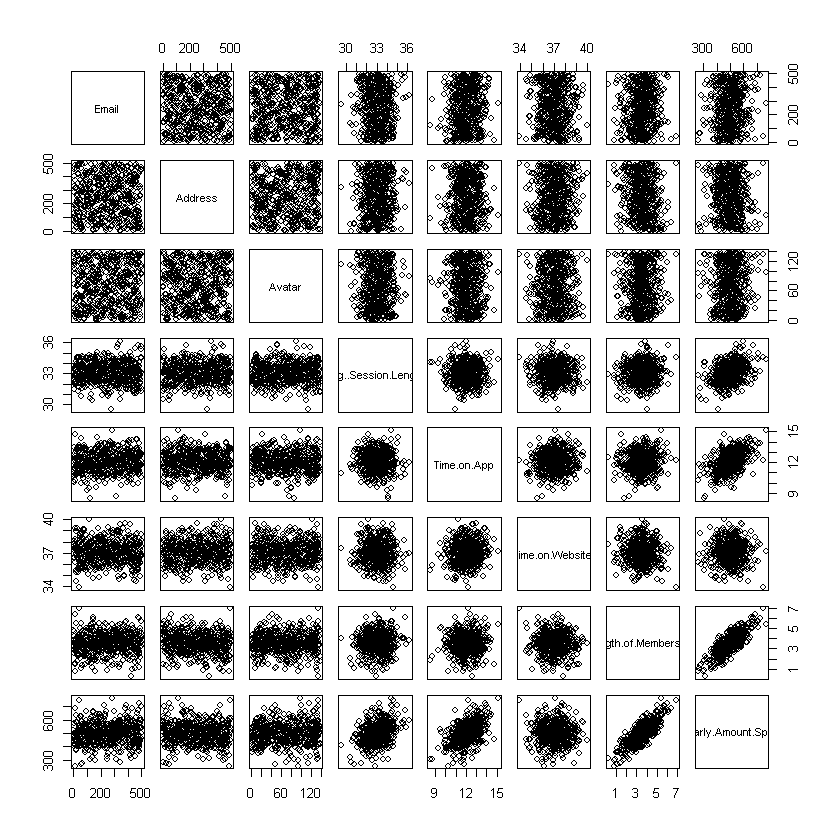

In [18]:
plot(dados)

### Ajustando o modelo

In [22]:
fit <- lm(Yearly.Amount.Spent~Avg..Session.Length+Time.on.App+Time.on.Website+Length.of.Membership,data=dados)

In [23]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Time.on.Website + Length.of.Membership, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.4059  -6.2191  -0.1364   6.6048  30.3085 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1051.5943    22.9925 -45.736   <2e-16 ***
Avg..Session.Length     25.7343     0.4510  57.057   <2e-16 ***
Time.on.App             38.7092     0.4510  85.828   <2e-16 ***
Time.on.Website          0.4367     0.4441   0.983    0.326    
Length.of.Membership    61.5773     0.4483 137.346   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 495 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic:  7766 on 4 and 495 DF,  p-value: < 2.2e-16


- Pelo p-valor dos testes T podemos ver que seria só a covariável tempo no site com parâmetro associado à covariável igual a zero (não significativa).
- Porém não convém fazer essa análise antes de se fazer a checagem do modelo.

Modelo o step(.) sugeriria:

In [24]:
step(fit)

Start:  AIC=2304.88
Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + Time.on.Website + 
    Length.of.Membership

                       Df Sum of Sq     RSS    AIC
- Time.on.Website       1        96   49332 2303.9
<none>                                49236 2304.9
- Avg..Session.Length   1    323812  373047 3315.4
- Time.on.App           1    732713  781948 3685.5
- Length.of.Membership  1   1876320 1925555 4136.1

Step:  AIC=2303.86
Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + Length.of.Membership

                       Df Sum of Sq     RSS    AIC
<none>                                49332 2303.9
- Avg..Session.Length   1    323767  373099 3313.5
- Time.on.App           1    739204  788535 3687.7
- Length.of.Membership  1   1879405 1928736 4134.9



Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Coefficients:
         (Intercept)   Avg..Session.Length           Time.on.App  
            -1035.34                 25.72                 38.75  
Length.of.Membership  
               61.56  


A função considerou a duração média da seção do cliente, tempo no app e tempo como membro no modelo e retirou o tempo no site.

In [25]:
# ajustando o modelo sugerido
fit <- lm(Yearly.Amount.Spent~Avg..Session.Length+Time.on.App+Length.of.Membership,data=dados)

In [26]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.628  -6.378  -0.135   6.351  30.169 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1035.3396    15.9829  -64.78   <2e-16 ***
Avg..Session.Length     25.7210     0.4508   57.05   <2e-16 ***
Time.on.App             38.7460     0.4494   86.21   <2e-16 ***
Length.of.Membership    61.5560     0.4478  137.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 496 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic: 1.036e+04 on 3 and 496 DF,  p-value: < 2.2e-16


O R ajustado (critério de seleção) foi praticamente o mesmo, então tempo não faz diferença no modelo.
Mas vale lembrar que antes dessa análise se faz necessário os testes das suposições.  

### Análise de influência

In [27]:
n <- dim(dados)[1] # tamanho da amostra

In [28]:
influence.measures(fit)

Influence measures of
	 lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App +      Length.of.Membership, data = dados) :

       dfb.1_  dfb.A..S  dfb.T..A  dfb.L..M     dffit cov.r   cook.d     hat
1    4.04e-02 -3.70e-02 -1.63e-02 -1.14e-02 -0.049581 1.013 6.15e-04 0.00748
2    7.92e-02 -6.01e-02 -5.16e-02 -4.18e-02  0.105918 1.004 2.80e-03 0.00771
3   -2.57e-02  8.69e-03  5.93e-02 -4.75e-02 -0.109188 0.987 2.97e-03 0.00379
4   -8.96e-02  6.85e-02  8.83e-02 -2.78e-02  0.123240 1.009 3.79e-03 0.01165
5   -1.93e-02  8.87e-03  2.62e-02  3.15e-02  0.055939 1.008 7.83e-04 0.00483
6    1.05e-02 -9.30e-03  8.17e-04 -2.53e-02 -0.030506 1.018 2.33e-04 0.01072
7    2.47e-02 -2.30e-02 -1.54e-02  2.52e-02  0.041301 1.015 4.27e-04 0.00828
8   -7.05e-03  1.37e-02 -9.98e-03 -3.45e-02 -0.053679 1.006 7.21e-04 0.00404
9   -6.75e-02  5.06e-02  6.97e-02 -1.82e-02  0.099707 1.006 2.48e-03 0.00779
10  -7.36e-02  6.95e-02  1.64e-02  1.59e-02 -0.096596 0.997 2.33e-03 0.00481
11   9.45e-02 

In [29]:
# alavancagem
hatvalues(fit)

1           2           3           4           5           6 
0.007475079 0.007707896 0.003785932 0.011645775 0.004834925 0.010719728 
          7           8           9          10          11          12 
0.008283170 0.004044787 0.007788008 0.004814380 0.009950629 0.003831090 
         13          14          15          16          17          18 
0.031259748 0.003965428 0.007403789 0.013458978 0.004211883 0.005342452 
         19          20          21          22          23          24 
0.026092789 0.010403514 0.005432276 0.012125165 0.013131984 0.002703371 
         25          26          27          28          29          30 
0.016403626 0.003463435 0.005884710 0.005372007 0.002320851 0.004965634 
         31          32          33          34          35          36 
0.002692841 0.005130264 0.008414753 0.005484340 0.003246228 0.002679362 
         37          38          39          40          41          42 
0.010962503 0.002091857 0.014093387 0.003846427 0.007151042 0.008793735 
         43          44          45          46          47          48 
0.004348125 0.005216039 0.010857436 0.006646721 0.009360213 0.004616938 
         49          50          51          52          53          54 
0.002297238 0.007023210 0.020110858 0.006514699 0.014753640 0.011770578 
         55          56          57          58          59          60 
0.007604200 0.004004881 0.008777861 0.009558993 0.002196271 0.003316125 
         61          62          63          64          65          66 
0.006016705 0.019430552 0.012173952 0.002465974 0.005177313 0.030797484 
         67          68          69          70          71          72 
0.003245350 0.002237236 0.004938052 0.005178903 0.003826400 0.007774526 
         73          74          75          76          77          78 
0.006865978 0.003479856 0.008598692 0.004355057 0.004012068 0.004609208 
         79          80          81          82          83          84 
0.007134794 0.002334399 0.007499118 0.009499120 0.009942726 0.010558539 
         85          86          87          88          89          90 
0.014227560 0.011181135 0.005605380 0.010054227 0.007932776 0.002748183 
         91          92          93          94          95          96 
0.005245879 0.007614277 0.003055420 0.018582603 0.004654905 0.005970464 
         97          98          99         100         101         102 
0.003638787 0.008930782 0.003561180 0.003854710 0.006541307 0.006716077 
        103         104         105         106         107         108 
0.005177637 0.003659172 0.010107352 0.005454361 0.003377679 0.008115932 
        109         110         111         112         113         114 
0.003766062 0.006364920 0.004958416 0.004348178 0.005194880 0.003760211 
        115         116         117         118         119         120 
0.010537955 0.005169702 0.004946543 0.006639026 0.003153318 0.005683502 
        121         122         123         124         125         126 
0.008383650 0.006007270 0.004367297 0.008934489 0.002372842 0.009239058 
        127         128         129         130         131         132 
0.003067018 0.011583364 0.007855665 0.003378265 0.003104172 0.007046254 
        133         134         135         136         137         138 
0.007884517 0.004450345 0.009011400 0.004523411 0.002614238 0.010172807 
        139         140         141         142         143         144 
0.006177692 0.007041940 0.010939564 0.005260430 0.007553034 0.012134392 
        145         146         147         148         149         150 
0.004484637 0.002876139 0.004287228 0.010794486 0.008154266 0.006461240 
        151         152         153         154         155         156 
0.010494824 0.018856258 0.012444265 0.019527941 0.021432584 0.007374621 
        157         158         159         160         161         162 
0.008518468 0.028777887 0.003022973 0.007547373 0.002382135 0.016338922 
        163         164         165         166         167         

In [30]:
h_bar <- fit$rank / n

In [31]:
limite  <- 2*h_bar

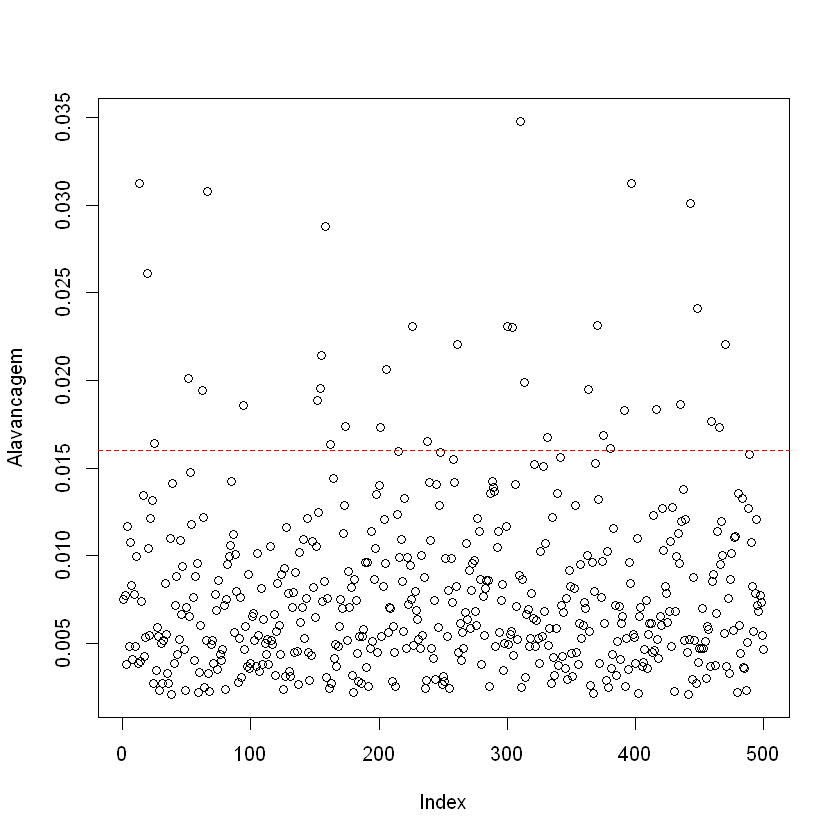

In [34]:
abline(plot(hatvalues(fit),ylab="Alavancagem"),
       col='red', h=limite, lty=2)

In [38]:
# DFFIT (o que cada observação influencia no y chapéu)
dffits(fit)

1             2             3             4             5 
-0.0495813171  0.1059176125 -0.1091884385  0.1232403402  0.0559386078 
            6             7             8             9            10 
-0.0305056393  0.0413014531 -0.0536794230  0.0997073329 -0.0965956032 
           11            12            13            14            15 
-0.1622099995  0.0550052286  0.1937856760  0.0744410476  0.0845341059 
           16            17            18            19            20 
 0.1202921051  0.1258278287 -0.0237343278 -0.0625622961  0.0950445777 
           21            22            23            24            25 
-0.0001969825 -0.0156429352  0.0495817939  0.0807982493 -0.0271015893 
           26            27            28            29            30 
-0.0856399855  0.0856829396  0.0148997363  0.0361917415 -0.1207756219 
           31            32            33            34            35 
 0.0658709314 -0.0899165632  0.0965914638  0.0243538095 -0.0348797668 
           36            37            38            39            40 
 0.0284022437 -0.0209323371  0.0178376854 -0.0098758153 -0.0517526485 
           41            42            43            44            45 
 0.0089405704 -0.0960638274  0.0885709696  0.0288017137  0.0057146113 
           46            47            48            49            50 
-0.0053854550 -0.0763797309  0.0054656384  0.0310040933 -0.0098653789 
           51            52            53            54            55 
 0.0099556601 -0.0018567442  0.1459938921 -0.0636471496  0.0554215362 
           56            57            58            59            60 
-0.0726265774 -0.0203375469 -0.0724359066  0.0709197574  0.0152928037 
           61            62            63            64            65 
 0.0863752859  0.0963852540 -0.0844170836  0.0636829378  0.0371662589 
           66            67            68            69            70 
-0.0075623238 -0.0007017571 -0.0448600124  0.0045263295  0.0513034358 
           71            72            73            74            75 
 0.0421137431 -0.1318436164 -0.0209148417 -0.0442390803  0.1420880057 
           76            77            78            79            80 
 0.1564969302 -0.0365037919  0.0649691694 -0.0824841363  0.0048004630 
           81            82            83            84            85 
-0.0385781441 -0.1008515639 -0.2299830587  0.0107045351  0.0761539589 
           86            87            88            89            90 
-0.1245250059  0.0149875070  0.0487222364 -0.1618457952 -0.0366528452 
           91            92            93            94            95 
 0.0786730985  0.0356303609 -0.0426621097 -0.0834197155  0.0327699605 
           96            97            98            99           100 
-0.0741819806 -0.1626059022 -0.0781897610  0.0342750862  0.0398373436 
          101           102           103           104           105 
 0.0152209101 -0.0738034086  0.1397273201 -0.0208751994  0.0100477450 
          106           107           108           109           110 
-0.1131667971 -0.0339607190 -0.1031880694  0.0907871510  0.0069577693 
          111           112           113           114           115 
-0.0166504345  0.0257955965 -0.1288765700 -0.0207614770 -0.0062752039 
          116           117           118           119           120 
-0.0050043210  0.0502631432  0.1292380544  0.0092625032 -0.0397240553 
          121           122           123           124           125 
 0.2018702895  0.0542173157  0.1060538859  0.0352499662  0.0430125018 
          126           127           128           129           130 
-0.0193984508 -0.0216020016  0.0022668160 -0.0082297227 -0.0182112661 
          131           132           133           134           135 
 0.1070829528 -0.0847597583 -0.0399491425 -0.0362643155  0.1192431454 
          136           137           138           139           140 
-0.0014987042  0.0548330497 -0.1121582820 -0.0405806055  0.0708269541 
          141           142         

In [36]:
limite <- 2*sqrt(fit$rank / n)

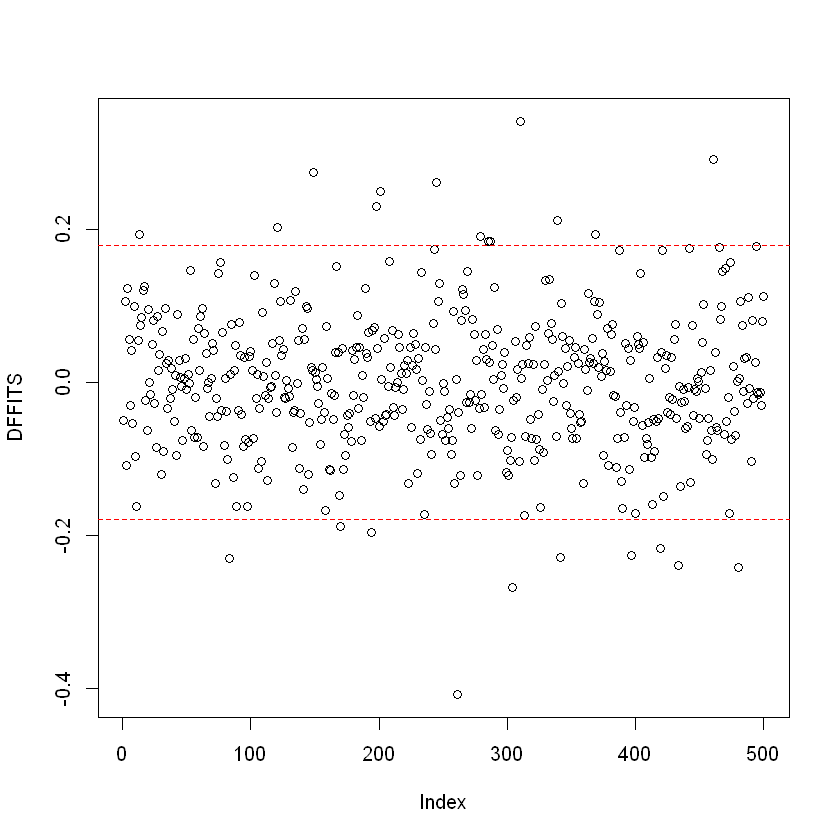

In [39]:
abline(plot(dffits(fit), ylab='DFFITS'),
       col='red', h=c(-limite, limite), lty=2)

In [40]:
# DFBETA
dfbetas(fit)

dfb1 <- dfbetas(fit)[,1]
dfb2 <- dfbetas(fit)[,2]
dfb3 <- dfbetas(fit)[,3]

,(Intercept),Avg..Session.Length,Time.on.App,Length.of.Membership
1,4.044648e-02,-3.703253e-02,-0.0162610738,-0.0113716226
2,7.916981e-02,-6.009833e-02,-0.0516380585,-0.0417580267
3,-2.569910e-02,8.686622e-03,0.0592859690,-0.0475441128
4,-8.958613e-02,6.848598e-02,0.0882621396,-0.0277896084
5,-1.927212e-02,8.873973e-03,0.0262068981,0.0315259784
6,1.052597e-02,-9.297952e-03,0.0008173991,-0.0252756022
7,2.473997e-02,-2.301156e-02,-0.0153843040,0.0251911212
8,-7.054052e-03,1.373053e-02,-0.0099812285,-0.0345196686
9,-6.754912e-02,5.055070e-02,0.0697323299,-0.0182057941
10,-7.361955e-02,6.945104e-02,0.0163992347,0.0159131981


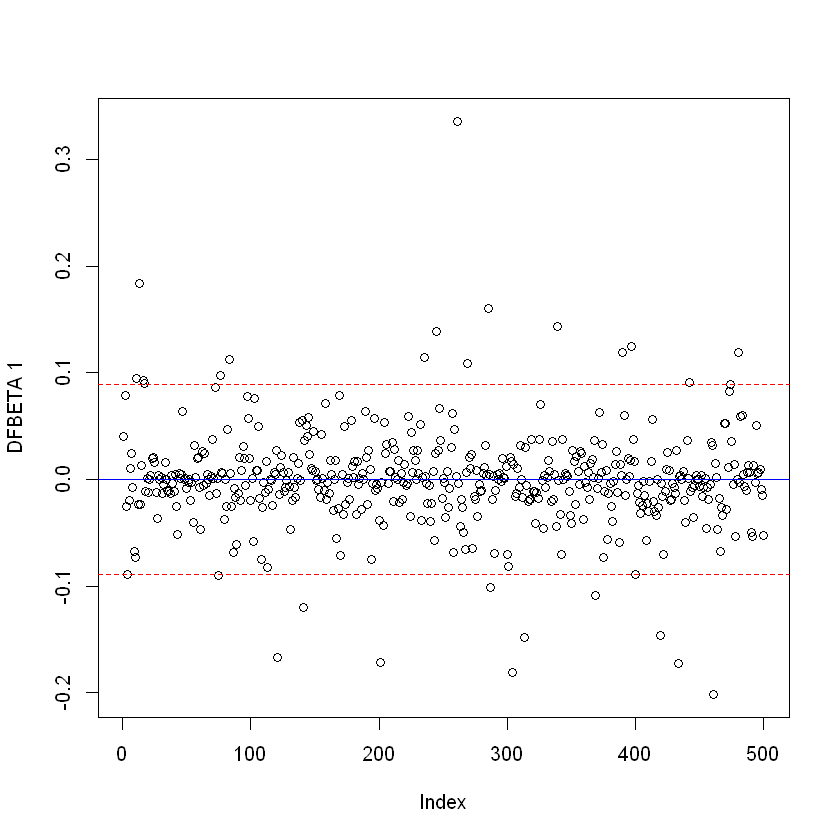

In [41]:
limite <- 2/sqrt(n)
abline(plot(dfb1,ylab="DFBETA 1"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

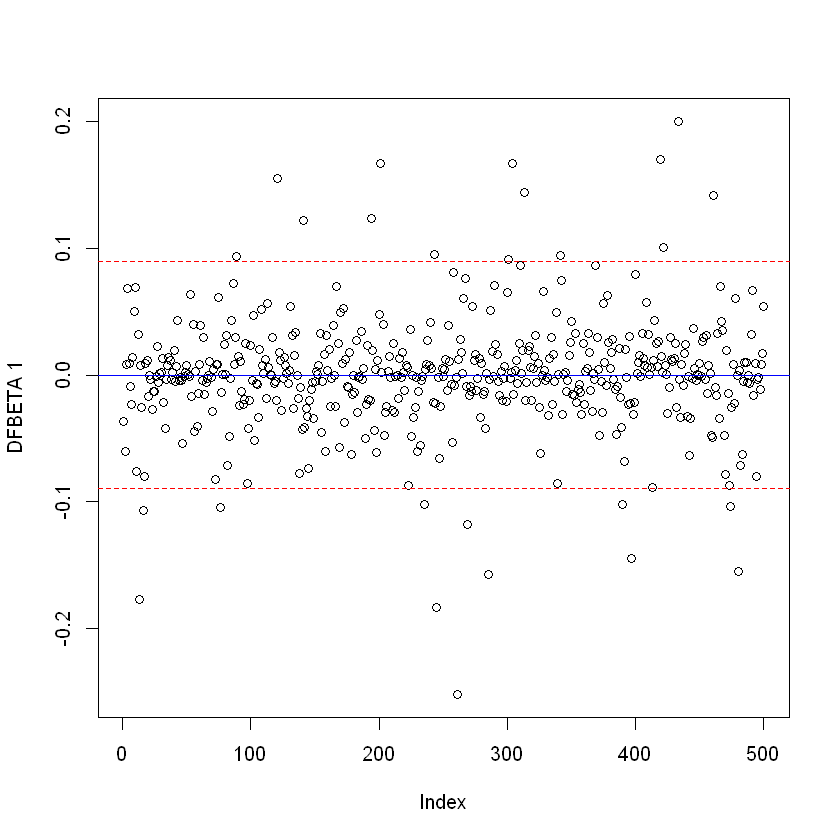

In [42]:
limite <- 2/sqrt(n)
abline(plot(dfb2,ylab="DFBETA 1"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

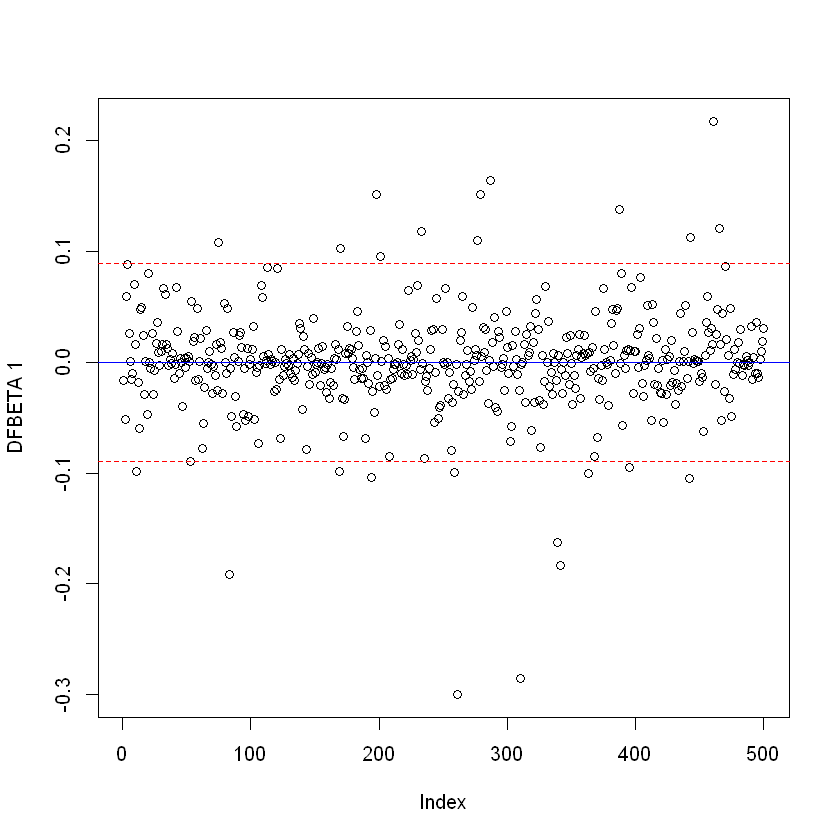

In [43]:
limite <- 2/sqrt(n)
abline(plot(dfb3,ylab="DFBETA 1"),
       col=c("red","blue","red"), h=c(-limite,0,limite), lty=c(2,1,2))

In [44]:
# distância de cook
cooks.distance(fit)

1            2            3            4            5            6 
6.154125e-04 2.802125e-03 2.967742e-03 3.794834e-03 7.828437e-04 2.330781e-04 
           7            8            9           10           11           12 
4.271378e-04 7.207923e-04 2.484053e-03 2.328318e-03 6.556633e-03 7.567192e-04 
          13           14           15           16           17           18 
9.385123e-03 1.384274e-03 1.786655e-03 3.617105e-03 3.936390e-03 1.410842e-04 
          19           20           21           22           23           24 
9.801977e-04 2.259009e-03 9.720123e-09 6.129647e-05 6.156004e-04 1.627468e-03 
          25           26           27           28           29           30 
1.839786e-04 1.829457e-03 1.834503e-03 5.560804e-05 3.277493e-04 3.632604e-03 
          31           32           33           34           35           36 
1.083419e-03 2.018936e-03 2.332010e-03 1.485443e-04 3.045342e-04 2.019568e-04 
          37           38           39           40           41           42 
1.097532e-04 7.968202e-05 2.443185e-05 6.699980e-04 2.002337e-05 2.306878e-03 
          43           44           45           46           47           48 
1.958060e-03 2.077372e-04 8.180640e-06 7.265366e-06 1.459592e-03 7.483291e-06 
          49           50           51           52           53           54 
2.405960e-04 2.437990e-05 2.482861e-05 8.636150e-07 5.324010e-03 1.014089e-03 
          55           56           57           58           59           60 
7.688154e-04 1.317827e-03 1.036031e-04 1.312948e-03 1.254154e-03 5.857726e-05 
          61           62           63           64           65           66 
1.864298e-03 2.325019e-03 1.783077e-03 1.012572e-03 3.458449e-04 1.432602e-05 
          67           68           69           70           71           72 
1.233645e-07 5.032092e-04 5.132219e-06 6.586672e-04 4.438735e-04 4.335035e-03 
          73           74           75           76           77           78 
1.095646e-04 4.897080e-04 5.033776e-03 6.066570e-03 3.335818e-04 1.055436e-03 
          79           80           81           82           83           84 
1.701091e-03 5.772635e-06 3.726717e-04 2.542449e-03 1.311027e-02 2.870402e-05 
          85           86           87           88           89           90 
1.451607e-03 3.873719e-03 5.626526e-05 5.943823e-04 6.518606e-03 3.362052e-04 
          91           92           93           94           95           96 
1.546822e-03 3.179156e-04 4.553868e-04 1.741933e-03 2.688852e-04 1.375974e-03 
          97           98           99          100          101          102 
6.528044e-03 1.529401e-03 2.940934e-04 3.972259e-04 5.803191e-05 1.362270e-03 
         103          104          105          106          107          108 
4.854006e-03 1.091374e-04 2.528978e-05 3.193086e-03 2.887166e-04 2.660328e-03 
         109          110          111          112          113          114 
2.055685e-03 1.212690e-05 6.944146e-05 1.666380e-04 4.134117e-03 1.079525e-04 
         115          116          117          118          119          120 
9.864360e-06 6.273394e-06 6.322227e-04 4.163036e-03 2.149064e-05 3.950768e-04 
         121          122          123          124          125          126 
1.011004e-02 7.356411e-04 2.803017e-03 3.111809e-04 4.627261e-04 9.425734e-05 
         127          128          129          130          131          132 
1.168615e-04 1.287208e-06 1.696600e-05 8.306364e-05 2.851269e-03 1.796009e-03 
         133          134          135          136          137          138 
3.996274e-04 3.292437e-04 3.550697e-03 5.626624e-07 7.514430e-04 3.143450e-03 
         139          140          141          142          143          144 
4.123074e-04 1.254855e-03 4.870933e-03 7.996063e-04 2.455329e-03 2.356962e-03 
         145          146          147          148          149          150 
3.614144e-03 6.925926e-04 8.992642e-05 5.970939e-05 1.851235e-02 4.122699e-05 
         151          152          153          154          

In [45]:
limite <- 4/(n-fit$rank)

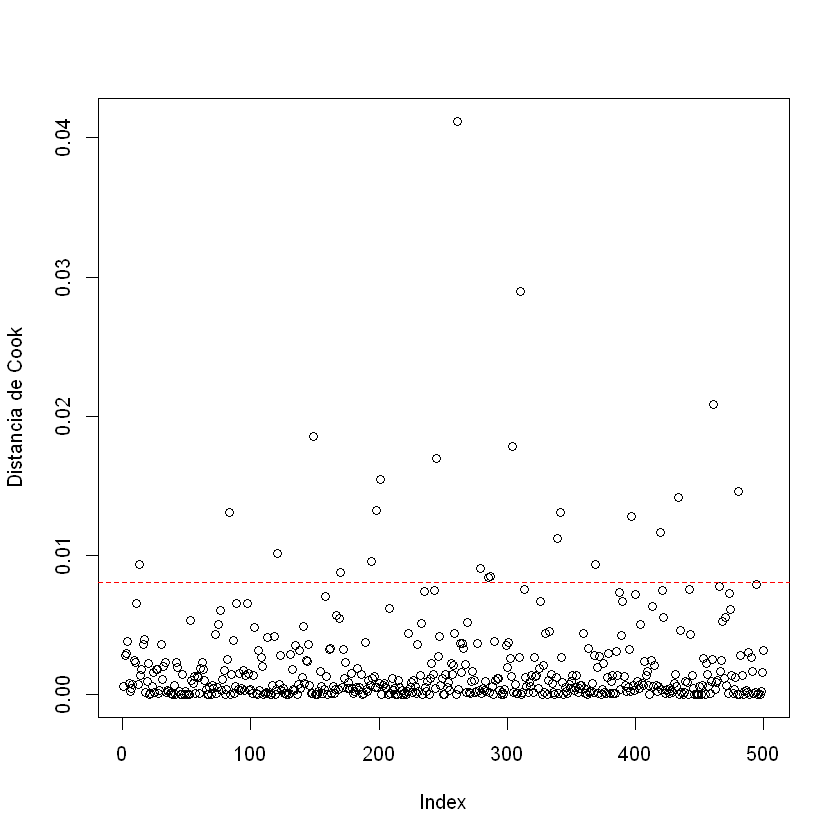

In [46]:
abline(plot(cooks.distance(fit), ylab="Distancia de Cook"),
       col='red', h=limite, lty=2)

In [47]:
# residuo
residuo <- rstudent(fit)

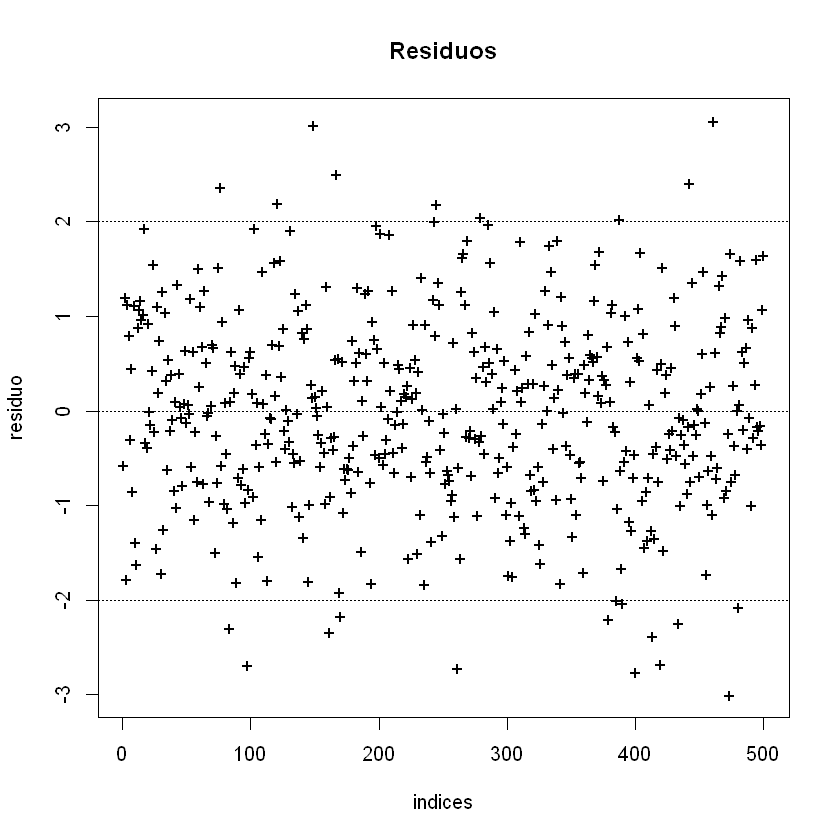

In [48]:
plot(residuo, type='p', pch='+', main='Residuos', xlab='indices')
abline(h=c(-2,0,2), lty=3)

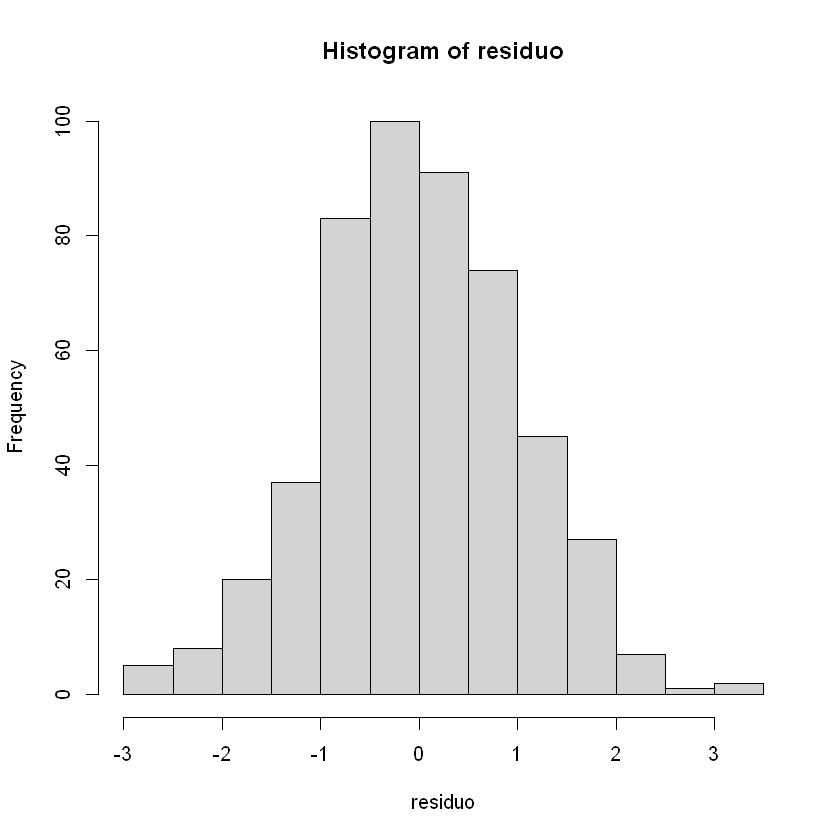

In [49]:
hist(residuo)

Acima podemos observar que a distribuição dos resíduos se parece com uma normal

Gaussian model (lm object) 


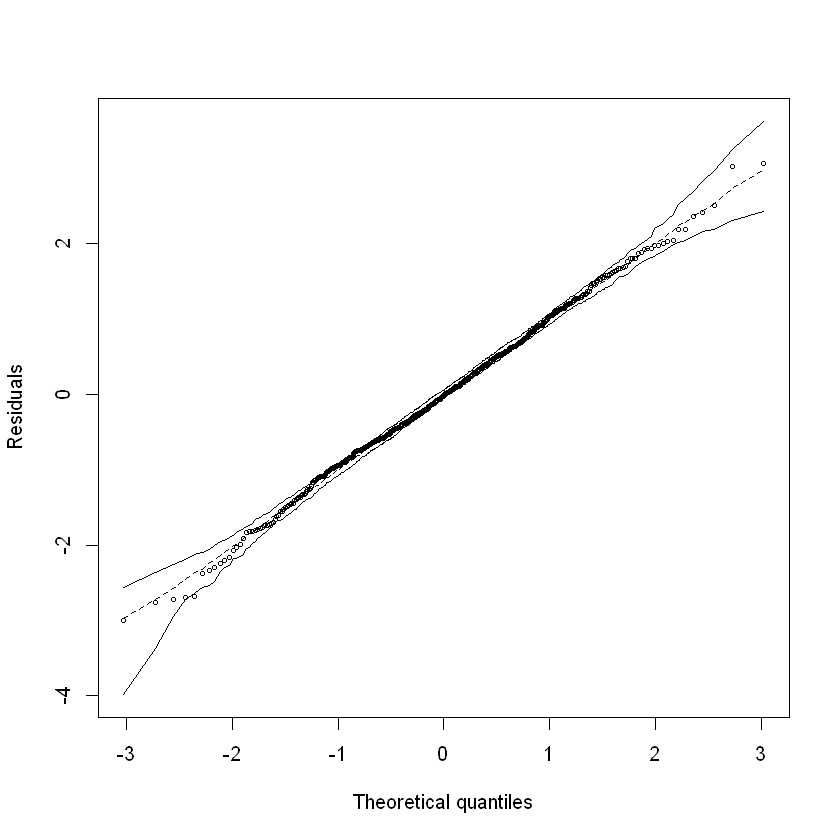

In [50]:
# envelope simulado baseado nos residuos studentizados
hnp(fit,resid.type ="student", halfnormal= F)

Acima no gráfico do envelope dos resíduos, temos eles "studentizados" e ordenados. Esse envelope são bandas de confiança e esperamos que pelo menos 90% dos resíduos estejam entre essas bandas. Essas bandas são feitas através de simulações de Monte Carlo.

Esse envelope indica, principalmente, que a suposição distribucional está correta. Ou seja, a distribuição normal é correta para modelar esses dados.

### Testando as suposições do modelo

- Suposições:
    - [S0] O modelo está corretamente especificado;
    - [S1] A média dos erros é zero;
    - [S2] Homoscedasticidade dos erros;
    - [S3] Não autocorrelação;
    - [S4] Ausência de multicolinearidade;
    - [S5] Normalidade dos erros.

In [51]:
# teste para [s0]
## H0: O modelo esta corretamente especificado
resettest(fit)


	RESET test

data:  fit
RESET = 0.15103, df1 = 2, df2 = 494, p-value = 0.8599


A hipótese nula não foi rejeitada

In [52]:
# teste para [s1]
## H0: Media dos erros e igual a zero
t.test(residuo,mu=0,alternative = "two.sided")


	One Sample t-test

data:  residuo
t = -0.0023141, df = 499, p-value = 0.9982
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.08823076  0.08802317
sample estimates:
    mean of x 
-0.0001037956 


A hipótese nula não foi rejeitada

In [54]:
# teste para [s2] (teste de Bressch-Pagan(Koenker) de heteroscedasticidade)
## H0: Erros sao homoscedasticos
bptest(fit, studentize = TRUE)


	studentized Breusch-Pagan test

data:  fit
BP = 5.7894, df = 3, p-value = 0.1223


A hipótese nula não foi rejeitada

In [55]:
# teste para [s3] (teste de Durbin-Watson de autocorrelacao)
## H0: Nao ha autocorrelacao
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 1.8885, p-value = 0.1068
alternative hypothesis: true autocorrelation is greater than 0


A hipótese nula não foi rejeitada

In [60]:
# teste para [s4] (usa fatores de inflacao de variancia para detectar multicolinearidade)
## regra de bolso: vif > 10 indica multicolinearidade. vif = 1 seria o ideal
vif(fit)

Avg..Session.Length          Time.on.App Length.of.Membership 
            1.004526             1.001731             1.004601

Não apresentou multicolinearidade entre as covariáveis. Uma das possíveis já tinha tirado antes (tempo no site x tempo no app)

In [61]:
# teste [s5] (teste Jarque-Bera de normalidade)
## H0: Os erros possuem distribuicao normal
jarque.bera.test(residuo) 


	Jarque Bera Test

data:  residuo
X-squared = 0.20113, df = 2, p-value = 0.9043


A hipótese nula não foi rejeitada

**Todas as suposições estão corretas.**

### Interpretação do modelo

In [63]:
summary(fit)


Call:
lm(formula = Yearly.Amount.Spent ~ Avg..Session.Length + Time.on.App + 
    Length.of.Membership, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.628  -6.378  -0.135   6.351  30.169 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1035.3396    15.9829  -64.78   <2e-16 ***
Avg..Session.Length     25.7210     0.4508   57.05   <2e-16 ***
Time.on.App             38.7460     0.4494   86.21   <2e-16 ***
Length.of.Membership    61.5560     0.4478  137.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.973 on 496 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9842 
F-statistic: 1.036e+04 on 3 and 496 DF,  p-value: < 2.2e-16


meu modelo explica 98,43% da variabilidade de y, o resto é aleatoriedade

$y = \beta_0 + \beta_1 X Avg..Session.Length + \beta_2 X Time.on.App + \beta_3 X Length.of.Membership$

- intercepto ou $\beta_0$: - 1.035,3396, um gasto negativo sinalizando essa perda média quando não há clientes.
- $\beta_1$ X **Avg..Session.Length**: cada minuto há mais na seção indica um gasto de 25,7210 dólares em média do cliente.
- $\beta_2$ X **Time.on.App**: cada minuto no app indica um gasto médio de 38,7460 do cliente.
- $\beta_3$ X **Length.of.Membership**: o cliente com 1 ano de membro tem um gasto médio há mais de 61,5560

### Predição

In [64]:
predict(fit)

1        2        3        4        5        6        7        8 
593.6313 380.2714 505.1402 570.5991 591.4190 640.0120 517.0803 558.2900 
       9       10       11       12       13       14       15       16 
559.0234 441.0035 508.6357 513.5068 398.0530 561.6779 460.7271 451.5798 
      17       18       19       20       21       22       23       24 
438.6464 410.9285 456.0807 595.8633 534.7323 421.3397 432.2538 503.9069 
      25       26       27       28       29       30       31       32 
702.9948 437.6262 608.8247 484.8205 522.0596 571.6972 484.9691 460.1362 
      33       34       35       36       37       38       39       40 
578.3008 487.8086 513.5311 516.4222 349.7508 486.8539 478.9891 546.1387 
      41       42       43       44       45       46       47       48 
531.7039 512.0005 577.8705 543.2846 447.6883 550.5157 601.7176 562.8736 
      49       50       51       52       53       54       55       56 
473.2918 417.5253 724.8981 442.8954 372.8215 457.2431 516.1102 495.0691 
      57       58       59       60       61       62       63       64 
523.0467 460.4910 481.6113 544.7230 605.8156 500.4470 621.1399 470.4101 
      65       66       67       68       69       70       71       72 
535.1349 765.9354 553.7241 478.7493 407.9803 444.4993 438.1992 610.6011 
      73       74       75       76       77       78       79       80 
420.6524 542.2335 563.1118 455.2808 450.0142 535.2793 498.4558 474.7695 
      81       82       83       84       85       86       87       88 
494.2256 473.1186 619.1061 337.2909 527.2345 548.3808 485.3922 468.9281 
      89       90       91       92       93       94       95       96 
565.0633 512.0706 438.2963 606.9554 523.5056 445.0681 509.3175 552.8583 
      97       98       99      100      101      102      103      104 
547.7614 622.8957 501.6786 488.9212 516.1982 399.0260 401.5252 495.5371 
     105      106      107      108      109      110      111      112 
409.0820 512.6915 500.3636 389.6578 555.7710 548.1431 461.6338 489.0574 
     113      114      115      116      117      118      119      120 
442.4635 425.7936 642.7054 414.0630 472.1356 577.3876 504.9059 576.5364 
     121      122      123      124      125      126      127      128 
554.5914 569.8646 498.3300 491.4868 505.5494 543.2226 520.7130 468.2379 
     129      130      131      132      133      134      135      136 
549.2000 434.7348 533.8836 583.3052 457.0823 548.1126 395.3966 482.5750 
     137      138      139      140      141      142      143      144 
518.5644 444.0235 481.3125 431.6374 462.0971 465.2567 452.6372 341.3742 
     145      146      147      148      149      150      151      152 
477.8867 515.5308 460.6086 478.2645 394.3774 464.3064 426.3600 684.5386 
     153      154      155      156      157      158      159      160 
558.3406 662.7548 599.0148 501.7900 590.4339 753.8104 499.6449 527.6431 
     161      162      163      164      165      166      167      168 
492.0590 366.4632 539.1677 494.1643 552.7203 508.0065 473.0183 573.3676 
     169      170      171      172      173      174      175      176 
525.5235 523.1703 416.7514 450.4739 672.1033 305.8752 471.2011 380.0136 
     177      178      179      180      181      182      183      184 
537.5952 563.4153 530.2941 504.6712 513.9200 552.3219 480.7027 458.4237 
     185      186      187      188      189      190      191      192 
571.0282 500.6371 424.5629 539.7511 512.2502 472.7303 609.1341 463.9909 
     193      194      195      196      197      198      199      200 
512.5946 563.9857 424.5279 417.0829 357.0862 643.4808 553.9352 472.3095 
     201      202      203      204      205      206      207      208 
486.3314 590.0474 449.5215 387.3009 573.1566 715.2737 414.0318 543.4832 
     209      210      211      212      213      214      215      216 
409.7770 455.9514 500.8143 554.9338 537.5136 558.4397 352.9600 524.5751 
     217      218      219      220      221      222      223   

In [65]:
m1 <- mean(dados$Avg..Session.Length)
m2 <- mean(dados$Time.on.App)
m3 <- mean(dados$Length.of.Membership)
cat(m1, m2, m3, "\n")

33.05319 12.05249 3.533462 


In [66]:
# predicao com novos dados
novos_dados <- data.frame(cbind(
    Avg..Session.Length = 33.05319, Time.on.App = 12.05249, Length.of.Membership = 3.533462)
)
predict(fit, newdata=novos_dados)

1 
499.3141

Na previsão acima, podemos observar que, se um cliente apresenta um tempo médio de sessão, tempo médio no aplicativo e possui três anos e meio como membro, ele tende a gastar aproximadamente 500 dólares por ano com o e-commerce.